# Simple Linear Regression

## Terminology for Linear Regression

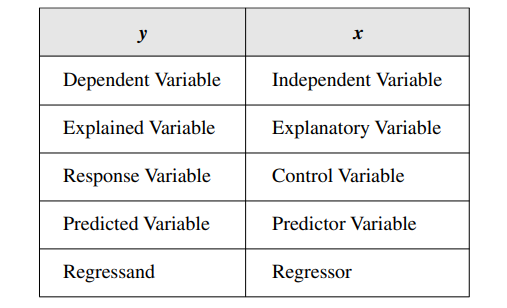

# Examples

### Example 01: CEO Salary vs ROE

**Variables** 
* $salary$ = CEO salary (1000s of dollars)
* $roe$ = return on equity (percent). It measures a company's profitability and its efficiency at generating profits. The higher the ROE, the more efficient a company's management is at generating income and growth from its equity financing (process of raising capital through the sale of shares).
\n
<div align="center">$ salary = \beta_0 +\beta_1 roe + u$ 

In [39]:
# Manually calculating the regression coefficients
# Dependencies
import wooldridge as woo
import numpy as np

ceosal1 = woo.dataWoo('ceosal1')
x = ceosal1['roe']
y = ceosal1['salary']

# ingredients to the OLS formulas:
cov_xy = np.cov(x, y)[1, 0]  # access 2. row and 1. column of covariance matrix
var_x = np.var(x, ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)

# manual calculation of OLS coefficients:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print(f'b1: {b1}\n')
print(f'b0: {b0}\n')


b1: 18.50118634521493

b0: 963.1913364725577



### Example 02: CEO Salary vs ROE (coefficients using Python modules)

In [40]:
# Calculating the coefficients using the library statsmodels
import statsmodels.formula.api as smf

# Importing dataset called "ceosal1"
ceosal1 = woo.dataWoo('ceosal1')

# OLS regression:
reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

# Notice that the estimated coefficients are the same using the manual and automatic computation

b: 
Intercept    963.191336
roe           18.501186
dtype: float64



##### Plotting Regression Best-fit Line (CEO Salary vs ROE)

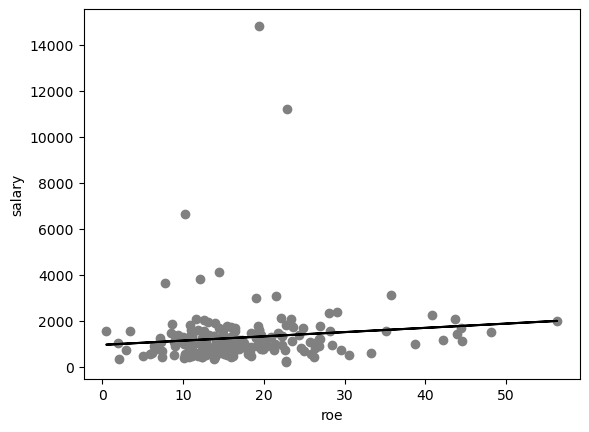

In [41]:
import matplotlib.pyplot as plt

# scatter plot,fitted values:
plt.plot('roe', 'salary', data=ceosal1, color='grey', marker='o', linestyle='')

# Regression line by joining fitted values
plt.plot(ceosal1['roe'], results.fittedvalues, color='black', linestyle='-')

plt.ylabel('salary')
plt.xlabel('roe')
plt.show()

### Example 04: Waves vs Education

**Variables** 
* $Y= wage$ (dollars/hour)
* $X = educ$ (years of education)
<div align="center">$ wage = \beta_0 +\beta_1 educ + u$

In [42]:
# Import dataset
wage1 = woo.dataWoo('wage1')

# Simple linear regression model:
reg = smf.ols(formula='wage ~ educ', data=wage1)

# Fitting/training the model:
results = reg.fit()

# Show estimated coefficients:
b = results.params
print(f'b: \n{b}\n')


b: 
Intercept   -0.904852
educ         0.541359
dtype: float64



### Example 05: Voting Outcomes vs Campaign Expenditures

**Variables**:
* X= Campaign expenditures shareA = share of campaign spending in %
* Y= election outcomes voteA = share of vote in %

<div align="center">$ voteA = \beta_0 +\beta_1 shareA + u$ 
<div align="center">$ voteA = 26.81 + 0.464  shareA + u$ 

b: 
Intercept    26.812214
shareA        0.463827
dtype: float64



Text(0.5, 0, 'shareA')

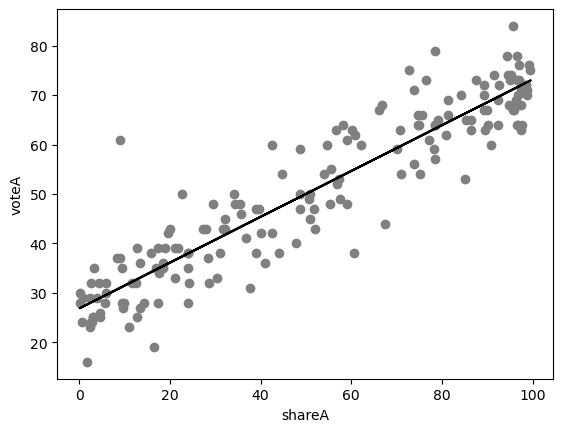

In [43]:
# Import dataset
vote1 = woo.dataWoo('vote1')

# OLS regression:
reg = smf.ols(formula='voteA ~ shareA', data=vote1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

# scatter plot and fitted values:
plt.plot('shareA', 'voteA', data=vote1, color='grey', marker='o', linestyle='')
plt.plot(vote1['shareA'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('voteA')
plt.xlabel('shareA')

## Residual Analysis

### Residuals for CEO Salary vs ROE

In [44]:
# Import dataset
import pandas as pd
ceosal1 = woo.dataWoo('ceosal1')

# OLS simple linear regression:
reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()

# obtain predicted values and residuals:
salary_hat = results.fittedvalues
u_hat = results.resid

# Create dataset table:
table = pd.DataFrame({'roe': ceosal1['roe'],
                      'salary': ceosal1['salary'],
                      'salary_hat': salary_hat,
                      'u_hat': u_hat})
print(f'table.head(15): \n{table.head(15)}\n')

table.head(15): 
          roe  salary   salary_hat       u_hat
0   14.100000    1095  1224.058071 -129.058071
1   10.900000    1001  1164.854261 -163.854261
2   23.500000    1122  1397.969216 -275.969216
3    5.900000     578  1072.348338 -494.348338
4   13.800000    1368  1218.507712  149.492288
5   20.000000    1145  1333.215063 -188.215063
6   16.400000    1078  1266.610785 -188.610785
7   16.299999    1094  1264.760660 -170.760660
8   10.500000    1237  1157.453793   79.546207
9   26.299999     833  1449.772523 -616.772523
10  25.900000     567  1442.372056 -875.372056
11  26.799999     933  1459.023116 -526.023116
12  14.800000    1339  1237.008898  101.991102
13  22.299999     937  1375.767778 -438.767778
14  56.299999    2011  2004.808114    6.191886



### Residuals Assumptions

* property 1: errors have zero mean
* Property 2: errors and regressors are uncorrelated
* Property 3: linearity

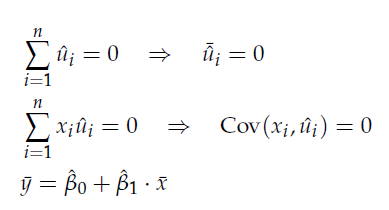

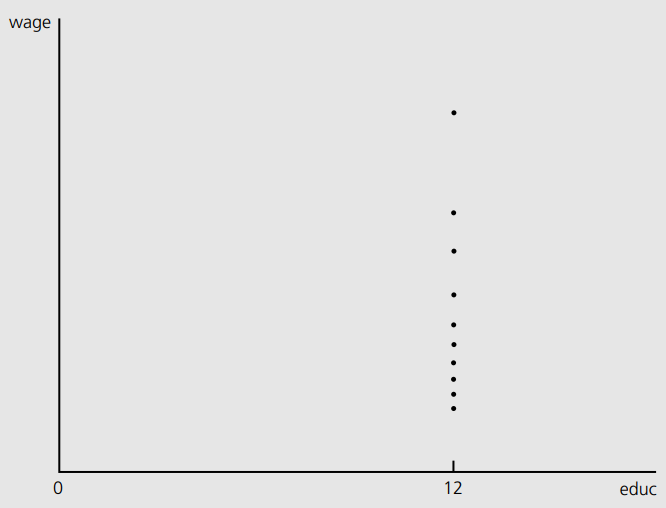

In [45]:
wage1 = woo.dataWoo('wage1')
reg = smf.ols(formula='wage ~ educ', data=wage1)
results = reg.fit()

# obtain coefficients, predicted values and residuals:
b = results.params
wage_hat = results.fittedvalues
u_hat = results.resid

# confirm property 1: average of residuals is 0
u_hat_mean = np.mean(u_hat)
print(f'u_hat_mean: {u_hat_mean}\n')

# confirm property 2: errors are NOT correlated
educ_u_cov = np.cov(wage1['educ'], u_hat)[1, 0]
print(f'educ_u_cov: {educ_u_cov}\n')

# confirm property 3
educ_mean = np.mean(wage1['educ'])
wage_pred = b[0] + b[1] * educ_mean
print(f'wage_pred: {wage_pred}\n')

wage_mean = np.mean(wage1['wage'])
print(f'wage_mean: {wage_mean}\n')

u_hat_mean: 1.080673362372776e-16

educ_u_cov: 7.443781041296288e-16

wage_pred: 5.896102674787035

wage_mean: 5.896102674787035



# Multiple Linear Regression

### Example: College GPA vs HS GPA and ACT

**Variables**:
* $Y$ =college GPA (colGPA)
* $X_1$ = high school GPA (hsGPA)
* $X_2$ = achievement test score (ACT)
* sample = 141 students.

In [46]:
# import dataset
gpa1 = woo.dataWoo('gpa1')

reg = smf.ols(formula='colGPA ~ hsGPA + ACT', data=gpa1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.53e-06
Time:                        11:08:23   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2863      0.341

### Example

In [47]:
k401k = woo.dataWoo('401k')

reg = smf.ols(formula='prate ~ mrate + age', data=k401k)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     77.79
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           6.67e-33
Time:                        11:08:23   Log-Likelihood:                -6422.3
No. Observations:                1534   AIC:                         1.285e+04
Df Residuals:                    1531   BIC:                         1.287e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.1190      0.779

# Simple Linear Regression (SLR) Assumptions

**Expected Values and Variances of OLS Estimators**
* $\hat{\beta_0}$ and $\hat{\beta_1}$ are estimators of population parameters that appear in the population simple linear regression model. 
* **Unbiasndness of Estimators**
* **Homoskedasticity**: “constant variance” assumption. Variation in the unobservables affecting $Y$ makes it difficult to estimate. Large variability in the independent variable $X$ is preferred: as variability in $X$ increases, the variance of the estimated slope $\beta_1$ decreases. The more spread out is the sample of independent variables, the easier it is to trace out the relationship between $Y$ and $X$.


* These are the SLR assumptions:

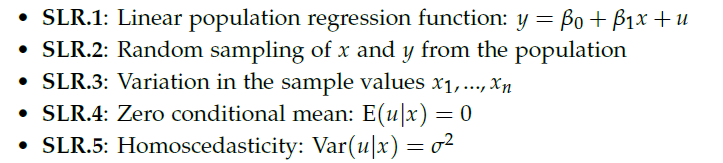

Under SLR.1 – SLR.4, OLS parameter estimators are unbiased.
Under SLR.1 – SLR.5, OLS parameter estimators have a specific sampling variance.

In [48]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats

# set the random seed:
np.random.seed(1234567)

# set sample size and number of simulations
n = 1000
r = 10000

# set true parameters:
beta0 = 1
beta1 = 0.5
su = 2
sx = 1
ex = 4

# initialize b0 and b1 to store results later:
b0 = np.empty(r)
b1 = np.empty(r)

# repeat r times:
for i in range(r):
    # draw a sample:
    x = stats.norm.rvs(ex, sx, size=n)
    u = stats.norm.rvs(0, su, size=n)
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y': y, 'x': x})

    # estimate OLS:
    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b0[i] = results.params['Intercept']
    b1[i] = results.params['x']


b0_mean: 1.0000553754821573

b1_mean: 0.5001388342750034

b0_var: 0.06737714678158624

b1_var: 0.00397682590010011



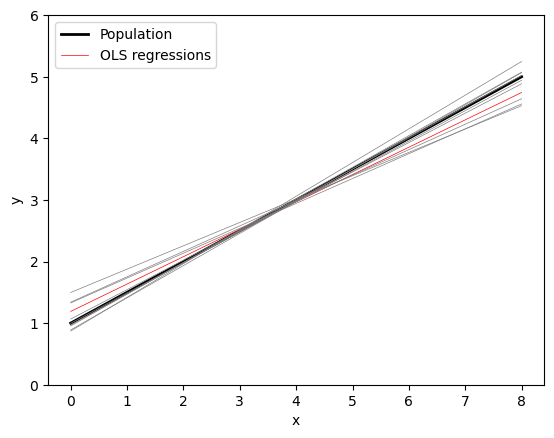

In [49]:
# MC estimate of the expected values:
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f'b0_mean: {b0_mean}\n')
print(f'b1_mean: {b1_mean}\n')

# MC estimate of the variances:
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f'b0_var: {b0_var}\n')
print(f'b1_var: {b1_var}\n')

# graph:
x_range = np.linspace(0, 8, num=100)
plt.ylim([0, 6])

# add population regression line:
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
         linestyle='-', linewidth=2, label='Population')

# add first OLS regression line (to attach a label):
plt.plot(x_range, b0[0] + b1[0] * x_range, color='red',
         linestyle='-', linewidth=0.5, label='OLS regressions')

# add OLS regression lines no. 2 to 10:
for i in range(1, 10):
    plt.plot(x_range, b0[i] + b1[i] * x_range, color='grey',
             linestyle='-', linewidth=0.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

## Violating Assumption 4: errors don't have zero mean

In [50]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats

# set the random seed:
np.random.seed(1234567)

# set sample size and number of simulations:
n = 1000
r = 10000

# set true parameters (betas and sd of u):
beta0 = 1
beta1 = 0.5
su = 2

# initialize b0 and b1 to store results later:
b0 = np.empty(r)
b1 = np.empty(r)

# draw a sample of x, fixed over replications:
x = stats.norm.rvs(4, 1, size=n)

# repeat r times:
for i in range(r):
    # draw a sample of y:
    u_mean = np.array((x - 4) / 5)
    u = stats.norm.rvs(u_mean, su, size=n)
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y': y, 'x': x})

    # estimate and store parameters by OLS:
    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b0[i] = results.params['Intercept']
    b1[i] = results.params['x']

# MC estimate of the expected values:
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f'b0_mean: {b0_mean}\n')
print(f'b1_mean: {b1_mean}\n')

# MC estimate of the variances:
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f'b0_var: {b0_var}\n')
print(f'b1_var: {b1_var}\n')


b0_mean: 0.20329460319240972

b1_mean: 0.6993695877596603

b0_var: 0.07158103946245628

b1_var: 0.004157652196227236



## Violating Assumption 4: Heteroskedasticity

1. **Biasdness**: eteroskedasticity does NOT cause bias in the regression coefficient estimates because unbiasedness property of OLS estimates does not require aconstant variance of residuals. However, the predictions from a heteroscedastic model can end up being biased (especially in the case of observations with large residuals).

2. **Validity of statistical inference**: standard errors, confidence intervals, p-values and other tests of significance are no longer reliable. OLS standard errors assume constant variance of residuals and the tests of significance are based on these standard errors. In heteroscedasticity, error variance is non-constant, therefore, OLS standard errors are not applicable. As a result, it is not advisable to rely on confidence intervals and p-values.

2. **Heteroskedasticity causes OLS to no longer be a minimum variance estimator**: heteroskedasticity causes the estimated variances of the regression coefficients to be biased leading to unreliable hypothesis testing. The t-statistics will actually appear to be more significant than they really are. OLS estimates no longer have the minimum variance property because the variance of residuals is not constant. The coefficients end up having larger standard errors and lower precision in the presence ofheteroscedasticity. Hence, OLS estimators become inefficient in the presence of heteroscedasticity.

4. **Predictions**: the forecasted or predicted values of the dependent variablebased on a heteroscedastic model will have high variance. This is because theOLS estimates are no longer effi cient. The variance of residuals is notminimum in presence of heteroscedasticity due to which the variance ofpredictions is also high.


## Example

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats

# set the random seed:
np.random.seed(1234567)

# set sample size and number of simulations:
n = 1000
r = 10000

# set true parameters (betas):
beta0 = 1
beta1 = 0.5

# initialize b0 and b1 to store results later:
b0 = np.empty(r)
b1 = np.empty(r)

# draw a sample of x, fixed over replications:
x = stats.norm.rvs(4, 1, size=n)

# repeat r times:
for i in range(r):
    # draw a sample of y:
    u_var = np.array(4 / np.exp(4.5) * np.exp(x))
    u = stats.norm.rvs(0, np.sqrt(u_var), size=n)
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y': y, 'x': x})

    # estimate and store parameters by OLS:
    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    results = reg.fit()
    b0[i] = results.params['Intercept']
    b1[i] = results.params['x']

# MC estimate of the expected values:
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f'b0_mean: {b0_mean}\n')
print(f'b1_mean: {b1_mean}\n')

# MC estimate of the variances:
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f'b0_var: {b0_var}\n')
print(f'b1_var: {b1_var}\n')
